Python 3.10.4
pip 22.3.1 from /Users/drainasr-edine/github/ingenieur_ia/P2_drai_nasr-edine/ia_project_2_env/lib/python3.10/site-packages/pip (python 3.10)
/Users/drainasr-edine/github/ingenieur_ia/P2_drai_nasr-edine
Using Python in /Users/drainasr-edine/github/ingenieur_ia/P2_drai_nasr-edine/ia_project_2_env:
[ OK ] Python is version 3.10.4 (main, Jul 17 2022, 13:52:49) [Clang 13.1.6 (clang-1316.0.21.2.5)]

[ OK ] jupyterlab
[ OK ] matplotlib
[ OK ] numpy
[ OK ] pandas
[ OK ] seaborn
[ OK ] statsmodels
[ OK ] folium
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numer

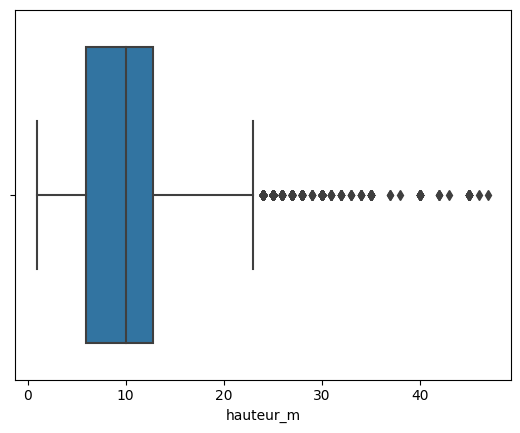

10.120300822881946 4.768587765782791 -4.185462474466428 24.426064120230322
Percentiles: 25th=6.000, 75th=12.812, IQR=6.812
Identified outliers: 2438


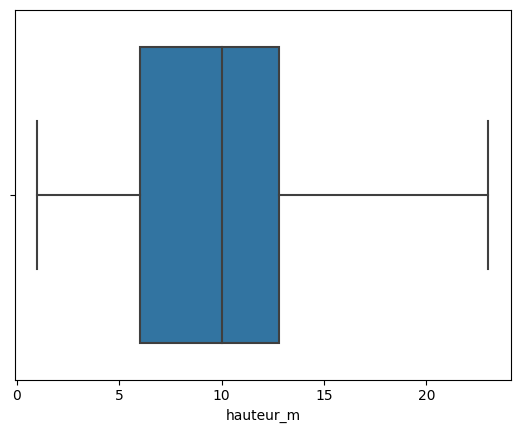

hauteur_m           0
circonference_cm    0
dtype: int64


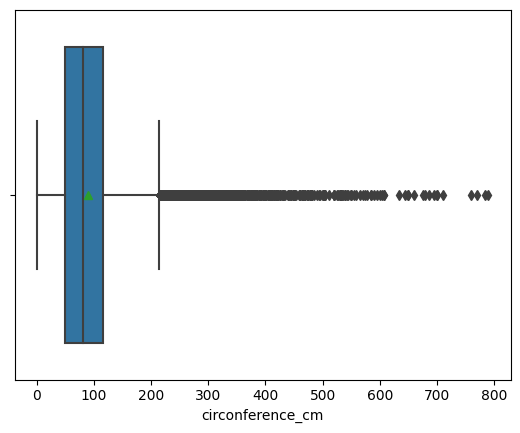

89.08666234328071 56.22193366513786 -79.57913865213287 257.75246333869427
Percentiles: 25th=49.000, 75th=115.000, IQR=66.000
Identified outliers: 5678


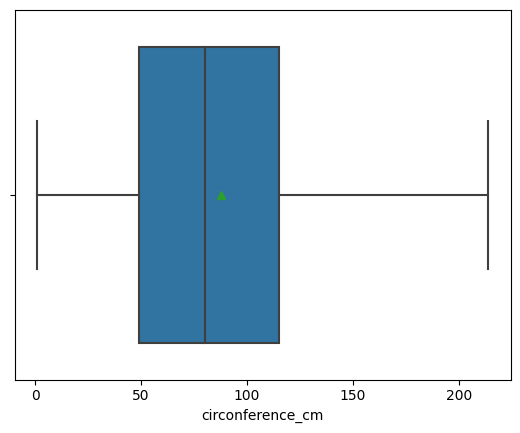

In [1]:
%%capture
%run ./3_clean_column_circonference.ipynb

# Distribution of trees by estate (domanialite)

Check if I have nulls in domanialite column

In [2]:
df[df.domanialite.isnull()]

,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,NaN,PARIS 20E ARRDT,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35.0,4.0,JA,0.0,48.849547,2.41419


Search if I have non-null domanialite in the same lieu

In [3]:
df_lieu = df[df.lieu == df.loc[df.domanialite.isnull(), 'lieu'].values[0]]
df_lieu[0:1].domanialite.values[0]

'Jardin'

In [4]:
df[df.domanialite.isnull()].domanialite.values[0]

nan

We replace null value in domanialite by Jardin.

In [5]:
df.loc[df[df.domanialite.isnull()].index[0], "domanialite"] = df_lieu[0:1].domanialite.values[0]

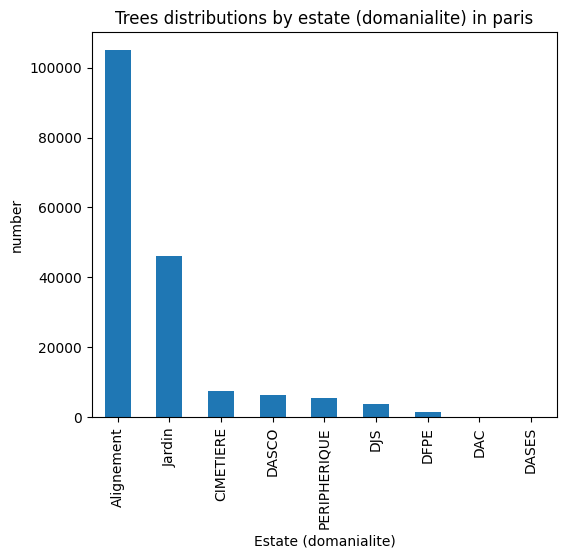

In [2]:
df_domanialite_groups = df.groupby("domanialite")['id'].count().sort_values(ascending=False)
df_domanialite_groups.plot(kind='bar', title='Trees distributions by estate (domanialite) in paris', ylabel='number',
         xlabel='Estate (domanialite)', figsize=(6, 5));

#### It can be seen that alignment and garden stand out clearly from the others